In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="1UdY7JnHR3QrjnPzQGBL")
project = rf.workspace("minseok-md9ge").project("face-detection-zrgwd")
version = project.version(1)
dataset = version.download("yolov11")

In [ ]:
!pip install ultralytics

In [ ]:
from ultralytics import YOLO

# Initialize the YOLOv11 model
model = YOLO('yolov8n.pt') 

# Train the model
model.train(
    data='/kaggle/working/face-detection-1/data.yaml',
    epochs=50,           # Number of epochs
    imgsz=640,           # Image size for training
    batch=16,            # Batch size
    project='face-detection-1',  # Project folder for saving results
    name='yolov11_face', # Run name
    device=0             # Use GPU (0) or CPU (-1)
)


In [ ]:
model.val(data='/kaggle/working/face-detection-1/data.yaml')

In [8]:
model.save('face_detection_model.pt')


0: 640x448 1 WIDER FACE - v1 2023-10-19 4-18pm, 32.9ms
Speed: 3.0ms preprocess, 32.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


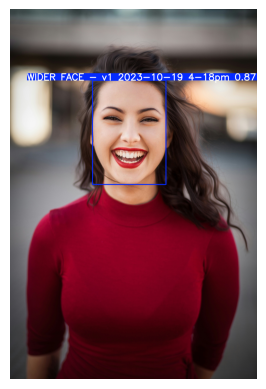

Prediction saved as 'prediction_result.jpg'


In [5]:
import requests
import cv2
import numpy as np
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Initialize the YOLO model with the trained weights
model = YOLO('/kaggle/working/face-detection-1/yolov11_face/weights/best.pt')  # Update the path if necessary

# URL of the online image
image_url = "https://images.unsplash.com/photo-1494790108377-be9c29b29330"  # Replace if Unsplash photo is different

# Download the image
response = requests.get(image_url, stream=True)
if response.status_code == 200:
    np_img = np.asarray(bytearray(response.content), dtype=np.uint8)
    image = cv2.imdecode(np_img, cv2.IMREAD_COLOR)  # Decode to OpenCV format
else:
    raise Exception("Failed to download the image.")

# Run the model on the image
results = model.predict(source=image, conf=0.6)  # Adjust confidence threshold if needed

# Visualize the predictions
annotated_image = results[0].plot()
plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# Optionally save the result
cv2.imwrite('prediction_result.jpg', annotated_image)
print("Prediction saved as 'prediction_result.jpg'")

In [ ]:
import requests
import cv2
import numpy as np
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Initialize the YOLO model with the trained weights
model = YOLO('/kaggle/working/face-detection-1/yolov11_face/weights/best.pt')  # Update the path if necessary

# URL of the online image
image_url = "/kaggle/input/attendence-dataset-for-dnn/Yolov8_label_images.v1i.yolov8/train/images/WhatsApp-Image-2024-12-06-at-12-19-02-PM-1-_jpeg.rf.105d4b1bbbc237f460826d2a18b318bd.jpg"  # Replace if Unsplash photo is different

# Run the model on the image
results = model.predict(source=image_url, conf=0.6)  # Adjust confidence threshold if needed

# Get the image and annotations
image = cv2.imread(image_url)
annotations = results[0].boxes  # This contains the bounding boxes

# Visualize the predictions and crop each face
for i, box in enumerate(annotations):
    # Extract the bounding box coordinates
    x1, y1, x2, y2 = map(int, box.xyxy[0])  # Convert to integer values

    # Crop the face from the image
    cropped_face = image[y1:y2, x1:x2]

    # Show the cropped face
    plt.figure(figsize=(5, 5))
    plt.imshow(cv2.cvtColor(cropped_face, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

    # Optionally, save each cropped face
    cv2.imwrite(f'cropped_face_{i}.jpg', cropped_face)
    print(f"Face {i} saved as 'cropped_face_{i}.jpg'")

# Optionally save the annotated image
annotated_image = results[0].plot()
cv2.imwrite('prediction_result.jpg', annotated_image)
print("Prediction saved as 'prediction_result.jpg'")
